In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv('child_speech_ml_db.csv')
print(df.head())

  child_id  Age Language           Phrase      Transcript  \
0     C001    3  English     Good morning      Gud mornin   
1     C002    3  English    I love my cat    I lub my cat   
2     C003    5  English        Thank you        Tank you   
3     C004    5  English  Can I play now?   Can I pay now   
4     C005    4  English   Please help me  Pwease help me   

   Pronounciation_Score          Accent/Noise_info  
0                    80              Slight accent  
1                    70         Background chatter  
2                    85                      Clear  
3                    75              Slight accent  
4                    60  Moderate background noise  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   child_id              718 non-null    object
 1   Age                   718 non-null    int64 
 2   Language              718 non-null    object
 3   Phrase                718 non-null    object
 4   Transcript            718 non-null    object
 5   Pronounciation_Score  718 non-null    int64 
 6   Accent/Noise_info     718 non-null    object
dtypes: int64(2), object(5)
memory usage: 39.4+ KB
None


In [4]:
print(df.describe())

              Age  Pronounciation_Score
count  718.000000            718.000000
mean     4.367688             88.635097
std      1.099594             10.755194
min      3.000000             60.000000
25%      3.000000             80.000000
50%      4.000000             90.000000
75%      5.000000            100.000000
max      6.000000            100.000000


In [5]:
print(df.isnull().sum())

child_id                0
Age                     0
Language                0
Phrase                  0
Transcript              0
Pronounciation_Score    0
Accent/Noise_info       0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_4080\1982292650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


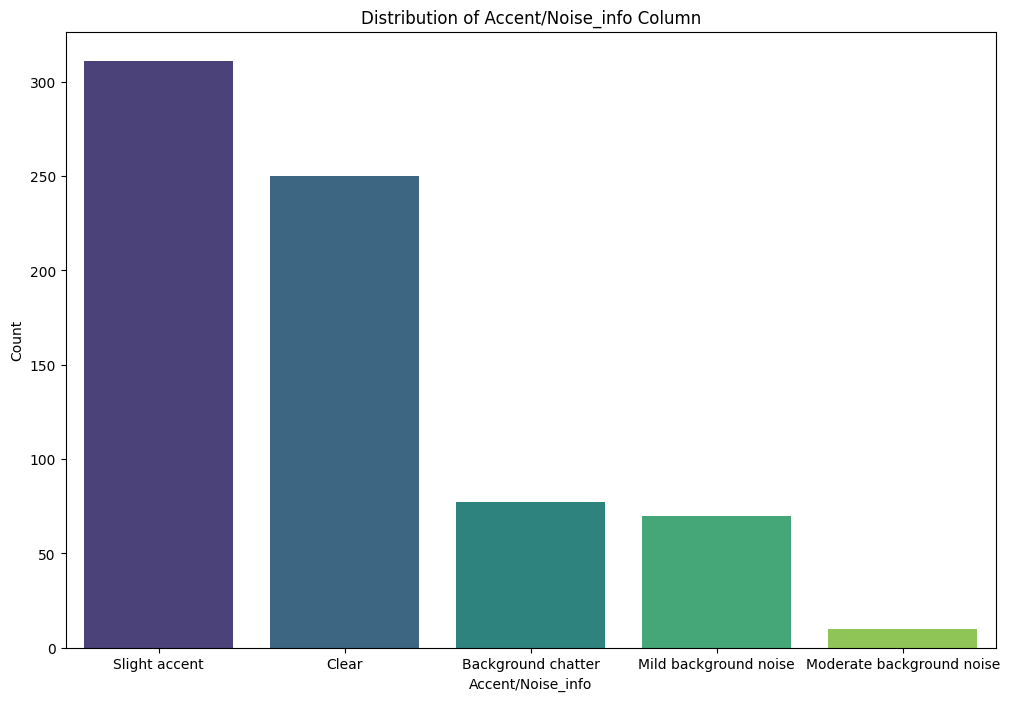

In [6]:
target_counts = df['Accent/Noise_info'].value_counts()

# plot the distribution bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.xlabel('Accent/Noise_info')
plt.ylabel('Count')
plt.title('Distribution of Accent/Noise_info Column')
plt.show()

In [7]:
#hnadling missing values
df = df.dropna()

In [8]:
# Convert categorical variables to numeric
label_encoder = LabelEncoder()
df['Accent/Noise_info'] = label_encoder.fit_transform(df['Accent/Noise_info'])

df.head()

,child_id,Age,Language,Phrase,Transcript,Pronounciation_Score,Accent/Noise_info
0,C001,3,English,Good morning,Gud mornin,80,4
1,C002,3,English,I love my cat,I lub my cat,70,0
2,C003,5,English,Thank you,Tank you,85,1
3,C004,5,English,Can I play now?,Can I pay now,75,4
4,C005,4,English,Please help me,Pwease help me,60,3


In [9]:
# Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Feature engineering: TfidfVectorizer for 'Transcript'
tfidf = TfidfVectorizer(max_features=50)  # Limit features to prevent overfitting
transcript_features = tfidf.fit_transform(df['Transcript']).toarray()

# Combine Tfidf features with numerical features
df_features = pd.concat([
    df[['Age', 'Pronounciation_Score']],  # Select numerical features
    pd.DataFrame(transcript_features, columns=tfidf.get_feature_names_out())
], axis=1)

In [10]:
# Target variable
X = df_features
y = df['Accent/Noise_info']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Best Model: SVM with Accuracy: 0.51



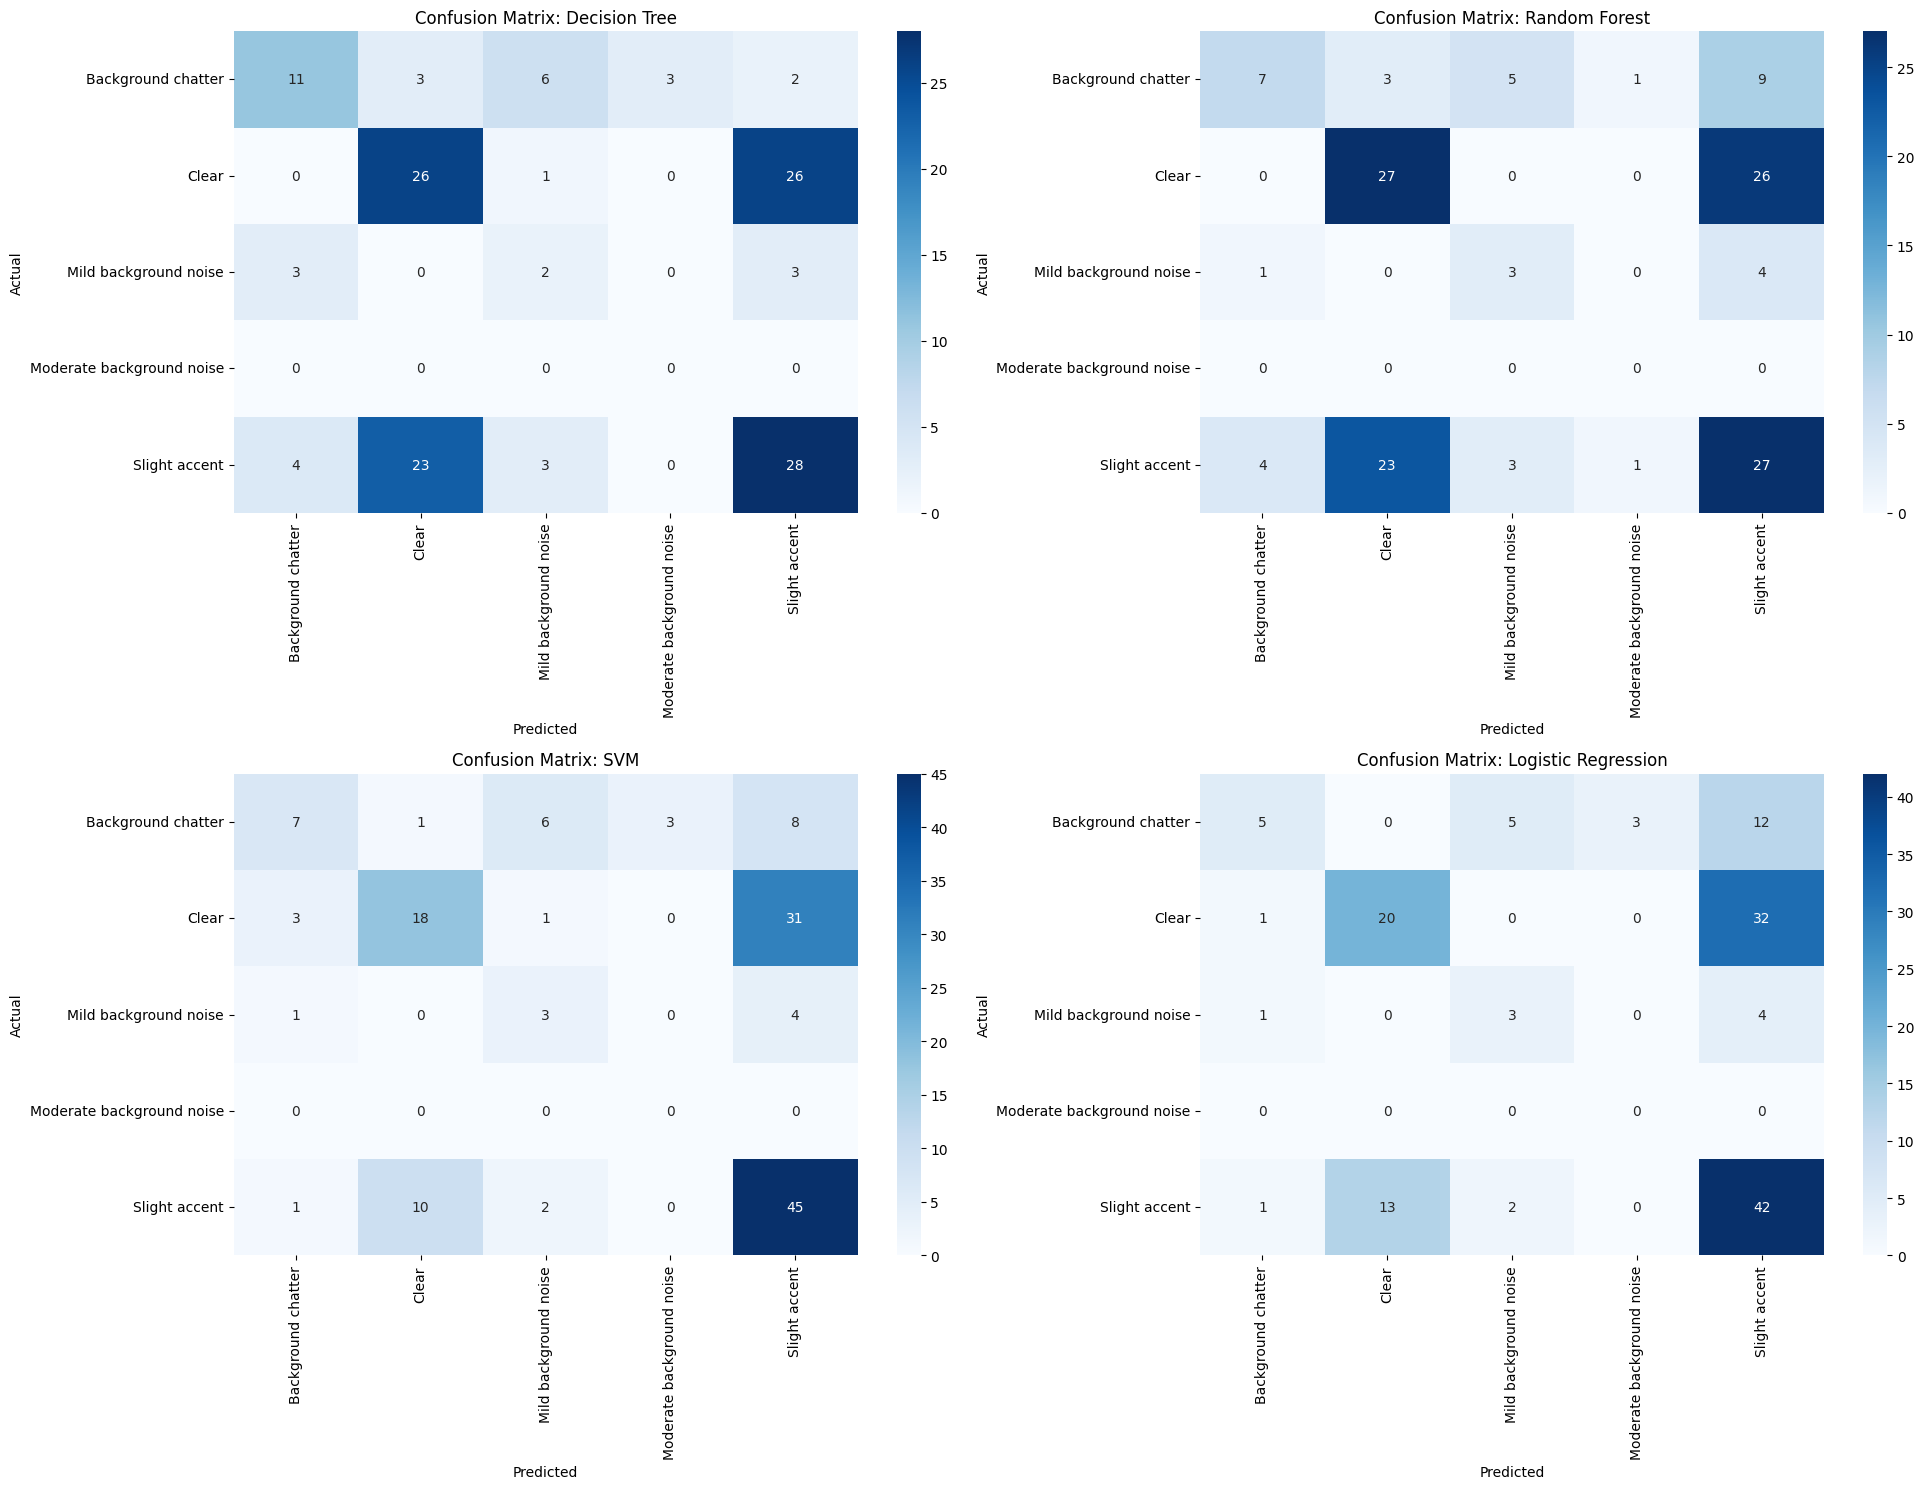

In [11]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        "Model": model,
        "Accuracy": acc,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Display results
best_model = max(results, key=lambda x: results[x]['Accuracy'])
print(f"Best Model: {best_model} with Accuracy: {results[best_model]['Accuracy']:.2f}\n")

# Visualization
# Plot Confusion Matrix for each model
plt.figure(figsize=(20, 15))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4080\3134885657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


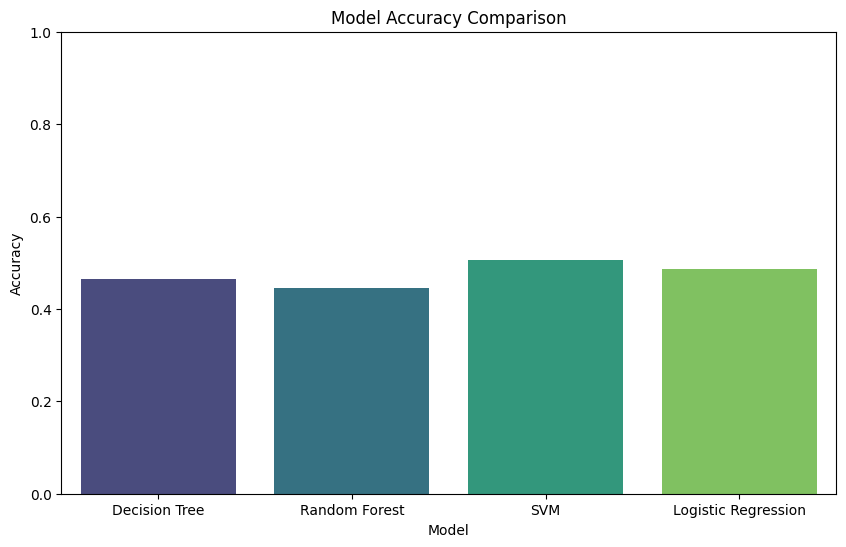


Classification Report for SVM:
                           precision    recall  f1-score   support

       Background chatter       0.58      0.28      0.38        25
                    Clear       0.62      0.34      0.44        53
    Mild background noise       0.25      0.38      0.30         8
Moderate background noise       0.00      0.00      0.00         0
            Slight accent       0.51      0.78      0.62        58

                 accuracy                           0.51       144
                macro avg       0.39      0.35      0.35       144
             weighted avg       0.55      0.51      0.49       144



c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [12]:
# Accuracy Comparison
model_names = list(results.keys())
accuracies = [result['Accuracy'] for result in results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Best Model Details
print(f"\nClassification Report for {best_model}:")
print(classification_report(y_test, results[best_model]['Model'].predict(X_test), target_names=label_encoder.classes_))

In [22]:
import joblib

# Save the best model
best_model_name = best_model.replace(" ", "_").lower()
model_filename = f"{best_model_name}_model.pkl"
joblib.dump(results[best_model]['Model'], model_filename)
print(f"Model saved as {model_filename}.")

# Load the model
loaded_model = joblib.load(model_filename)
print(f"Model {best_model} loaded successfully.")

# Make predictions with the loaded model
sample_data = {
    'Age': [3.0],
    'Pronounciation_Score': [70.0],  
    'Transcript': ["Can I play now?"] 
}

# Preprocess the sample data
sample_transcript_features = tfidf.transform(sample_data['Transcript']).toarray()
sample_df = pd.concat([
    pd.DataFrame({'Age': sample_data['Age'], 'Pronounciation_Score': sample_data['Pronounciation_Score']}),
    pd.DataFrame(sample_transcript_features, columns=tfidf.get_feature_names_out())
], axis=1)

# Standardize the sample data
sample_df_scaled = scaler.transform(sample_df)

# Predict
predicted_class = loaded_model.predict(sample_df_scaled)
predicted_class_label = label_encoder.inverse_transform(predicted_class)

print(f"Predicted Accent/Noise_info: {predicted_class_label[0]}")


Model saved as svm_model.pkl.
Model SVM loaded successfully.
Predicted Accent/Noise_info: Mild background noise
